# Evaluation Project - 3. Avacado Project

### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

- __Content__

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, accuracy_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

## Importing the DATASET

In [2]:
avacado=pd.read_csv("avocado.csv")

### Checking Top 5 rows Data

In [3]:
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## EDA

### Checking Total Numbers of Rows and Column

In [4]:
avacado.shape

(18249, 14)

### Checking All Column Names

In [5]:
avacado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

### Checking Data Type of All Data

In [6]:
avacado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

### Checking for Null Values

In [7]:
avacado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

__There is no null value present in our dataset__

### Checking for Null Values through heatmap also

<AxesSubplot:>

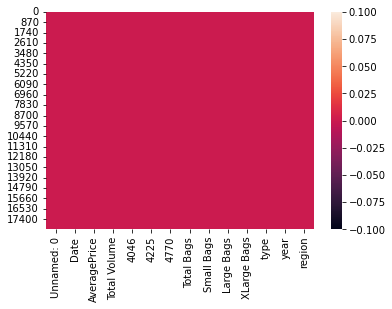

In [8]:
sns.heatmap(avacado.isnull())

We can check through visualization also that there is no Null Value present in our Dataset.

### Information about Data (Memory Used and Data Types)

In [9]:
avacado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Checking for blank value in our Target Column

In [10]:
avacado[avacado['AveragePrice'] == ''].index

Int64Index([], dtype='int64')

So, we can check there are no blank value present in our Target Column

In [11]:
# Checking whether the dataset contains any space
avacado[avacado['AveragePrice'] == '']

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


So we can see there are no spaces present in the dataset.

### Checking unique values present in the Target Variable.

In [12]:
avacado['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [13]:
avacado['AveragePrice'].nunique()

259

### Checking unique elements in each  columns

In [14]:
avacado.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

### Total Values in the target variable

In [15]:
avacado['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

### Data Cleaning and preprocessing

#### Dropping irrelevant column

In [16]:
#First column is 'Unnamed: 0' and this column have no any relation with our Target Column. So, we will drop this column.
avacado=avacado.drop(columns="Unnamed: 0", axis=1)

In [17]:
#Column 'Date' have no any relation with our Target Column. So, we will drop this column.
avacado=avacado.drop(columns="Date", axis=1)

In [18]:
# checking columns again after dropping
avacado.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

## Descriptive Statistics

In [19]:
# Description of Dataset : works only on continuous column 
avacado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- So, we can see that 10 columns are continuous column: 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year' 
      
      
- and 2 columns are categorical column: 'type', 'region'

### Checking Description through heatmap also.

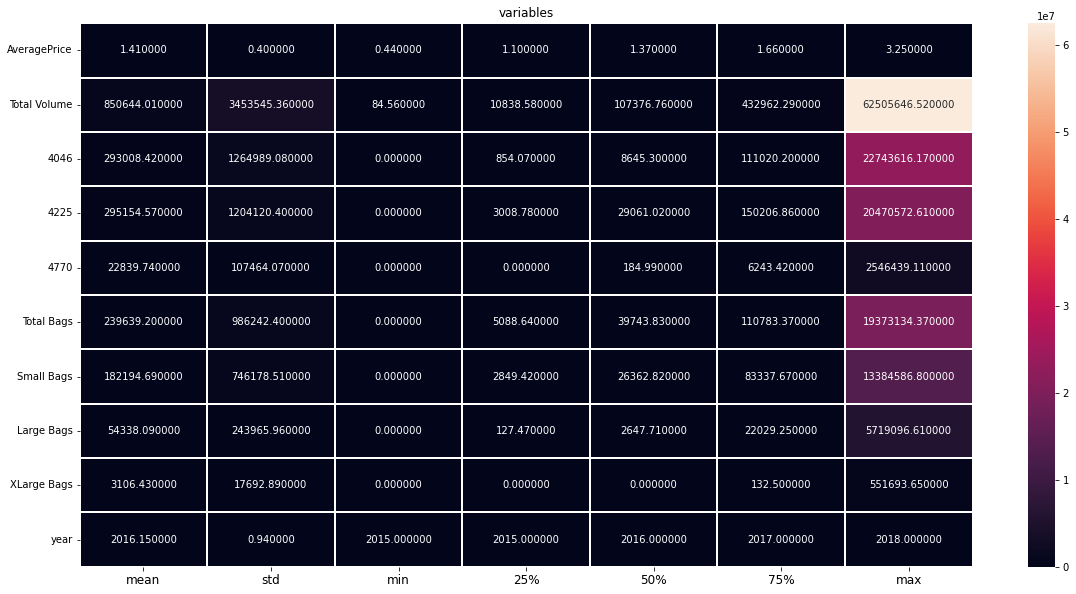

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(round(avacado.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

### Observation of Describe of Datasets:

- The summary of this dataset looks good as there are no negative/ invalid value present.
- We can see the counts of all the columns are 18249.000000 which means no null values are present.
- Total No of Rows: 18249 and Total No. of Columns: 14
- We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column.

1. __AveragePrice:__
- Mean= 1.405978, 
- std= 0.402677, 
- Min= 0.440000, 
- Max= 3.250000

2. __Total Volume:__
- Mean= 8.506440e+05, 
- std= 3.453545e+06, 
- Min= 8.456000e+01, 
- Max= 6.250565e+07

3. __4046:__
- Mean= 2.930084e+05, 
- std= 1.264989e+06, 
- Min= 0.000000e+00, 
- Max= 2.274362e+07

4. __4225:__
- Mean= 2.951546e+05, 
- std= 1.204120e+06, 
- Min= 0.000000e+00, 
- Max= 2.047057e+07

5. __4770:__
- Mean= 2.283974e+04, 
- std= 1.074641e+05, 
- Min= 0.000000e+00, 
- Max= 2.546439e+06

6. __Total Bags:__
- Mean= 2.396392e+05, 
- std= 9.862424e+05, 
- Min= 0.000000e+00, 
- Max= 1.937313e+07

7. __Small Bags:__
- Mean= 1.821947e+05, 
- std= 7.461785e+05, 
- Min= 0.000000e+00, 
- Max= 1.338459e+07

8. __Large Bags:__
- Mean= 5.433809e+04, 
- std= 2.439660e+05, 
- Min= 0.000000e+00, 
- Max= 5.719097e+06

9. __XLarge Bags:__
- Mean= 3106.426507, 
- std= 17692.894652, 
- Min= 0.000000, 
- Max= 551693.650000

10. __year:__
- Mean= 2016.147899, 
- std= 0.939938, 
- Min= 2015.000000, 
- Max= 2018.000000					


- __We can observe that the dataset seems to be having more outliers as well as skewness in the data on the basis of Quantile median result.__

## Data Visualization

### Univariate Analysis

###### Using Countplot 

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

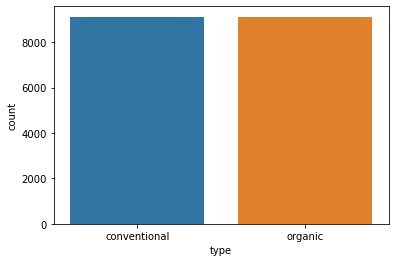

In [21]:
#Countplot for "type" column
print(avacado['type'].value_counts())
sns.countplot('type',data=avacado)

We can see that the total number of conventional avacado sold is 9126 and the total number of organic avacado sold is 9123.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

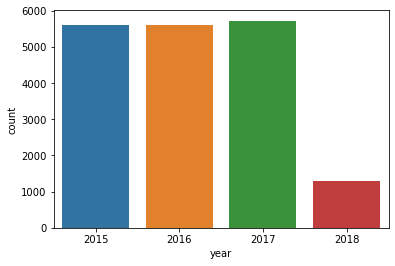

In [22]:
#Countplot for "year" column
print(avacado['year'].value_counts())
sns.countplot('year',data=avacado)

We can see that: 
- In the year 2017, the total number of avocado sold was 5722.
- In the year 2016, the total number of avocado sold was 5616
- In the year 2015, the total number of avocado sold was 5615
- In the year 2018, the total number of avocado sold was 1296

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

<AxesSubplot:xlabel='count', ylabel='region'>

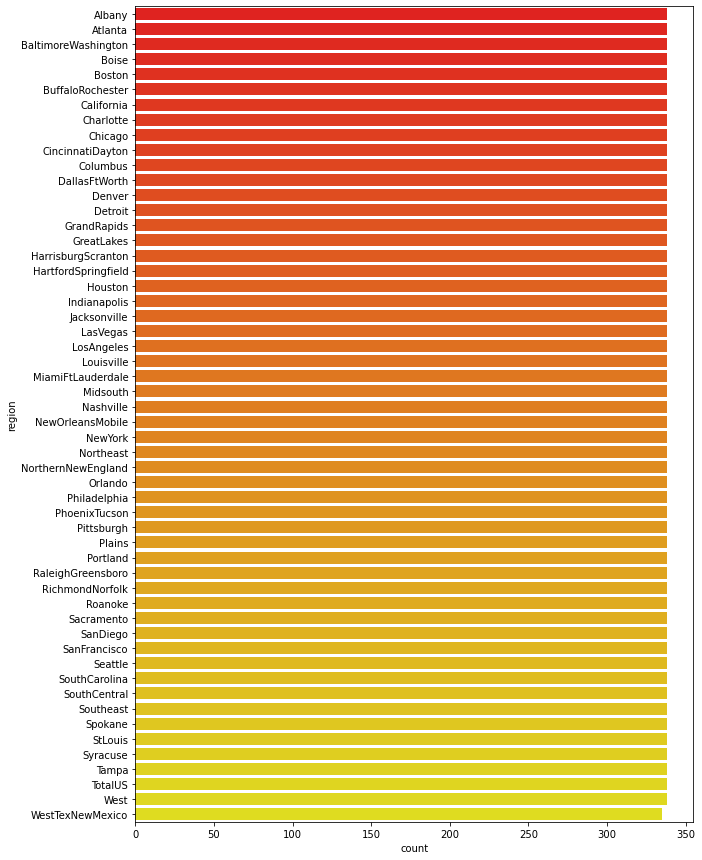

In [23]:
#Countplot for "region" column
print(avacado['region'].value_counts())
plt.figure(figsize=(10,15))
sns.countplot(y='region', data=avacado, palette='autumn')

All "Region" have 338 observation and only "WestTexNewMexico" have 335 observation

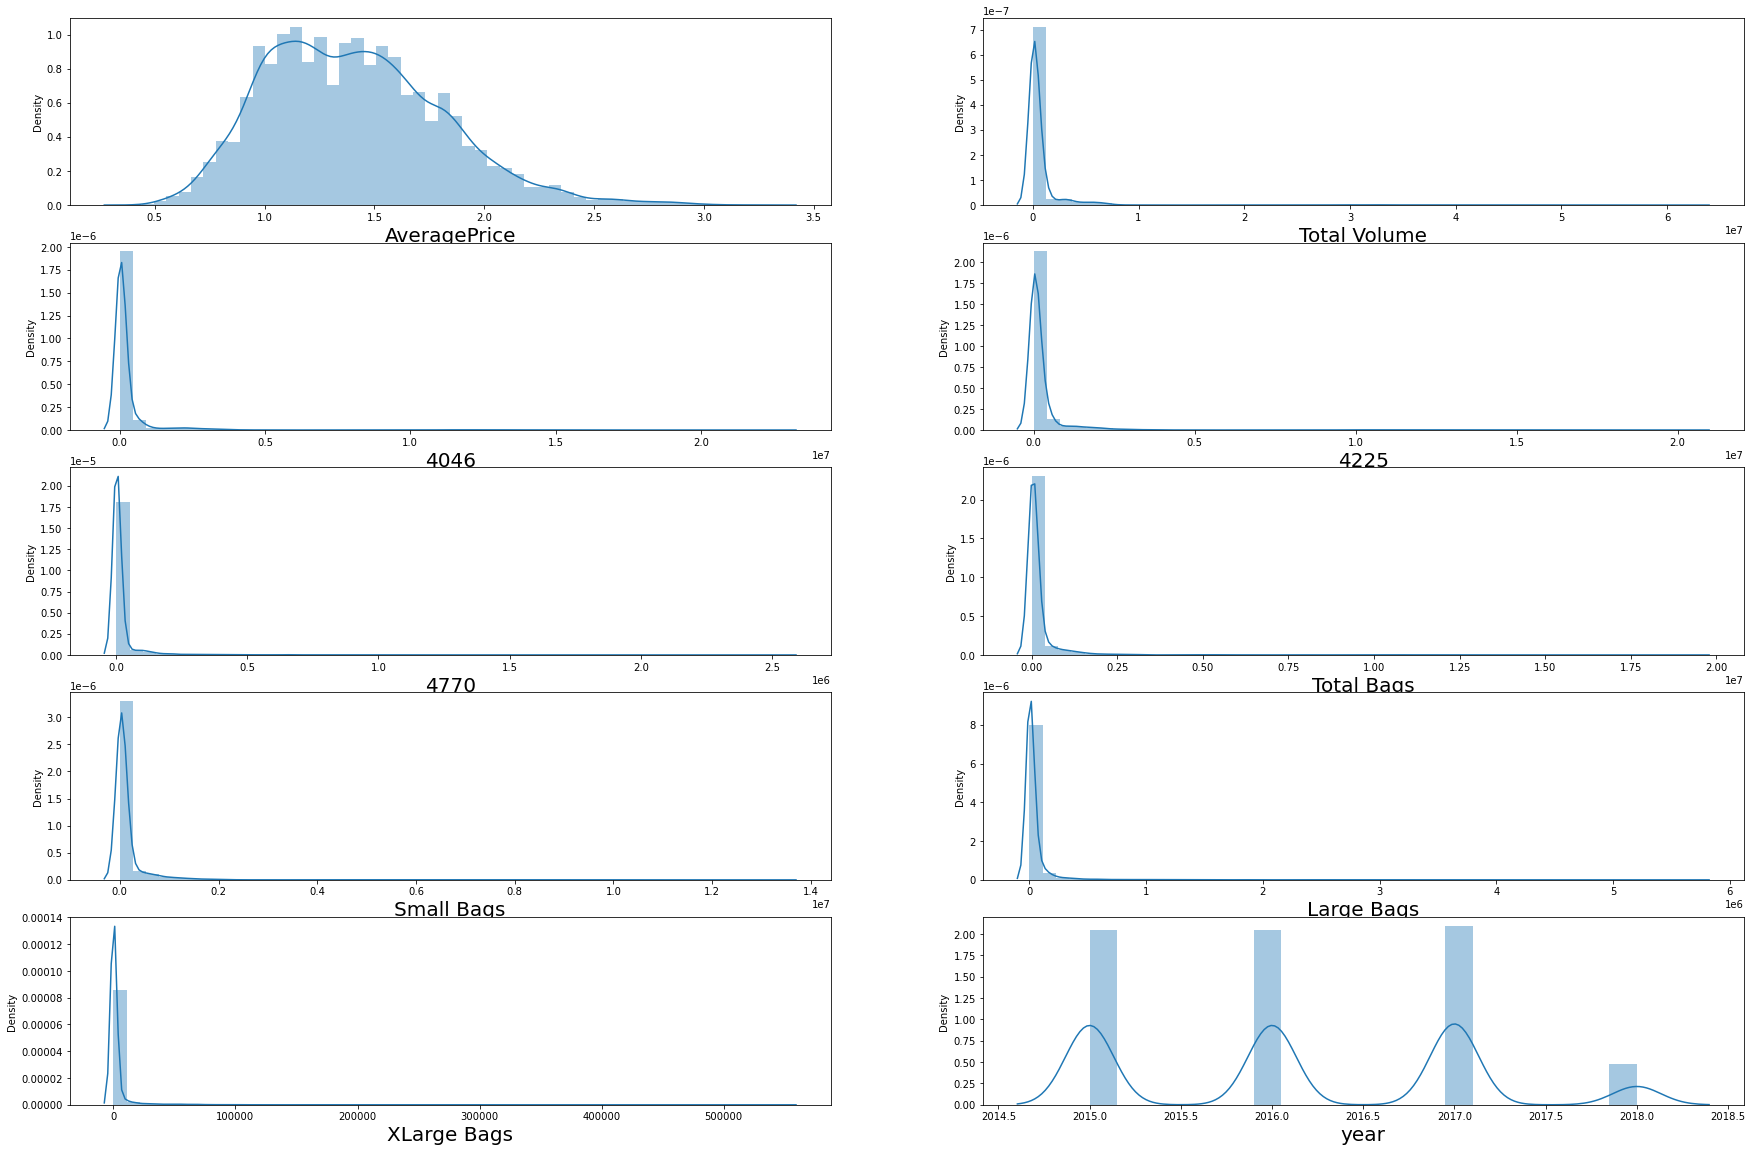

In [24]:
collist=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year']
plt.figure(figsize=(30,20))
plotnumber = 1

for column in avacado[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(avacado[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see there are skewness present in all continuous columns and data is not normalised

### Bivariate Analysis

##### Using Scatterplot

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

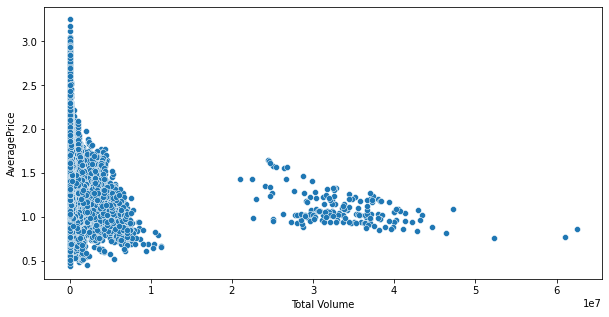

In [25]:
#Scatterplot for comparision between "Total Volume" and "AveragePrice" column
print(avacado['Total Volume'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Volume', y='AveragePrice', data=avacado)

"Total Volume" 4103.97 have 2 Average price and "Total Volume" 17489.58 have 1 Average price

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

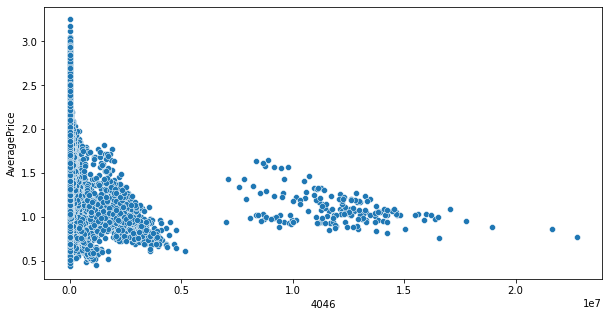

In [26]:
#Scatterplot for comparision between "4046" and "AveragePrice" column
print(avacado['4046'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='4046', y='AveragePrice', data=avacado)

"4046" 0.00 have 242 Average Price and "4046" 2894.77 have 1 Average Price

0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64


<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

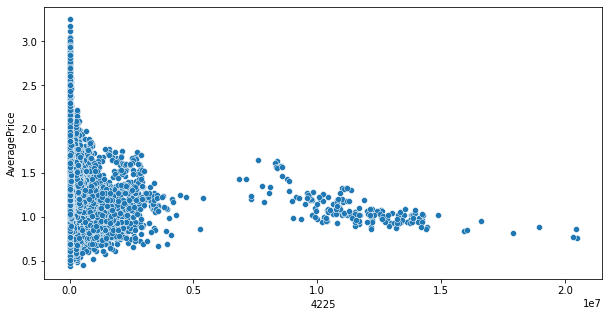

In [27]:
#Scatterplot for comparision between "4225" and "AveragePrice" column
print(avacado['4225'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='4225', y='AveragePrice', data=avacado)

"4225" 0.00 have 61 Average Price and "4225 2356.13 have 1 Average Price

0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, Length: 12071, dtype: int64


<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

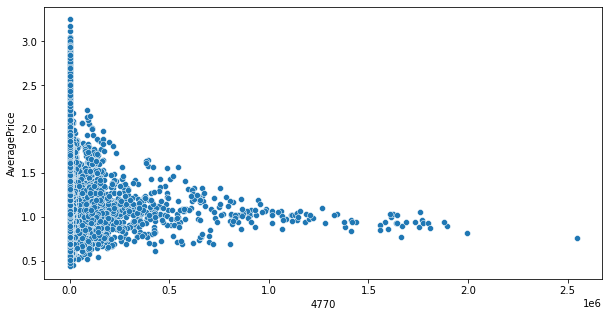

In [28]:
#Scatterplot for comparision between "4770" and "AveragePrice" column
print(avacado['4770'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='4770', y='AveragePrice', data=avacado)

"4770" 0.00 have 5497 Average Price and "4770" 224.53 have 1 Average Price

0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: Total Bags, Length: 18097, dtype: int64


<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

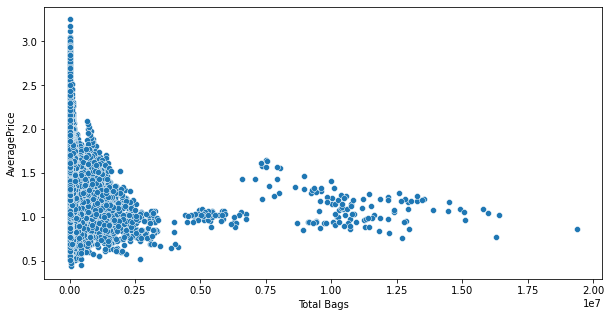

In [29]:
#Scatterplot for comparision between "Total Bags" and "AveragePrice" column
print(avacado['Total Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Bags', y='AveragePrice', data=avacado)

"Total Bags" 0.00 have 15 Average Price and "Total Bags" 12014.15 have 1 Average Price

0.00        159
203.33       11
223.33       10
533.33       10
123.33        8
           ... 
14002.00      1
32441.00      1
29560.96      1
22077.20      1
11988.14      1
Name: Small Bags, Length: 17321, dtype: int64


<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

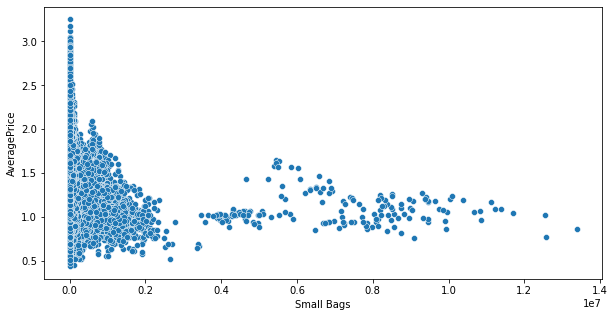

In [30]:
#Scatterplot for comparision between "Small Bags" and "AveragePrice" column
print(avacado['Small Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Small Bags', y='AveragePrice', data=avacado)

"Small Bags" 0.00 have 159 Average Price and "Small Bags" 11988.14 have 1 Average Price

0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: Large Bags, Length: 15082, dtype: int64


<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

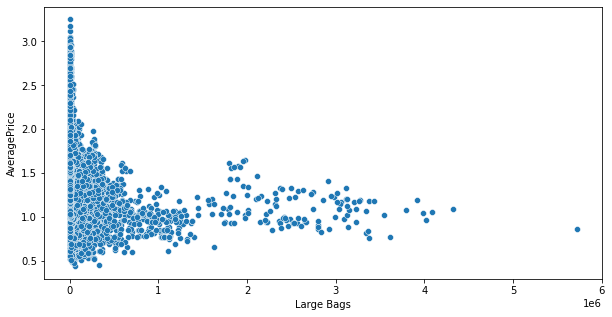

In [31]:
#Scatterplot for comparision between "Large Bags" and "AveragePrice" column
print(avacado['Large Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Large Bags', y='AveragePrice', data=avacado)

"Large Bags" 0.00 have 2370 Average Price and "Large Bags" 26.01 have 1 Average Price

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64


<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

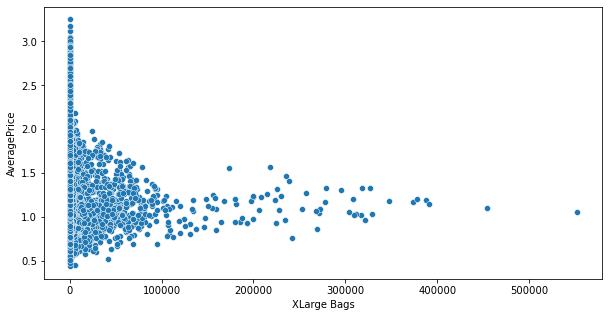

In [32]:
#Scatterplot for comparision between "XLarge Bags" and "AveragePrice" column
print(avacado['XLarge Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='XLarge Bags', y='AveragePrice', data=avacado)

"XLarge Bags" 0.00 have 12048 Average Price and "XLarge Bags" 24.18 have 1 Average Price

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

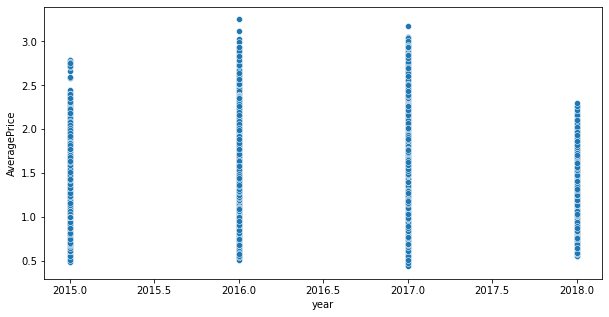

In [33]:
#Scatterplot for comparision between "year" and "AveragePrice" column
print(avacado['year'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='year', y='AveragePrice', data=avacado)

Average price in 2017 is high as 5722 Avacado sold in year 2017 and Average price in 2018 is low as 1296 Avacado sold in year 2018

##### Using Barplot for comparision

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

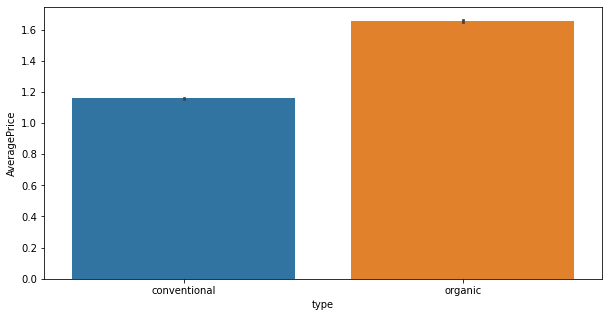

In [34]:
#Barplot for comparision between "type" and "AveragePrice" column
plt.figure(figsize=(10,5))
sns.barplot(x='type', y='AveragePrice', data=avacado)

Average Price of Organic type Avacado is higher than conventional type Avacado

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

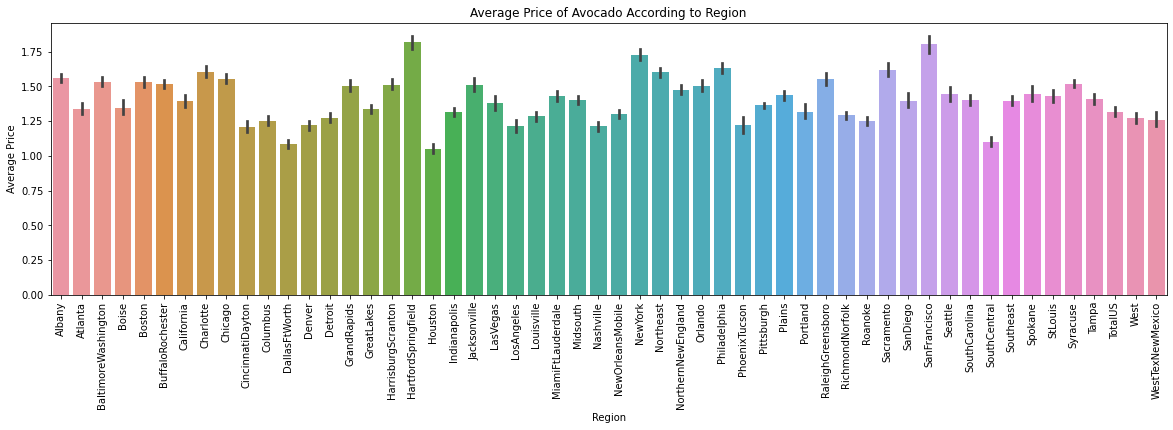

In [35]:
#Barplot for comparision between "region" and "AveragePrice" column
plt.figure(figsize=(20,5))
sns.barplot(x='region', y='AveragePrice', data=avacado)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

##### The region where Average price is very high is:- HartfordSpringfield and Top five region where Average price is very high are:
- SanFrancisco
- HartfordSpringfield
- NewYork
- Philadelphia
- Sacramento

##### The region where Average price is very low is:- Houston and Top five region where Average price is very low are:
- Houston
- SouthCentral
- DallasFtWorth
- CincinnatiDayton
- PhoenixTucson

Text(0.5, 1.0, 'Total Volume of Avocado According to Region')

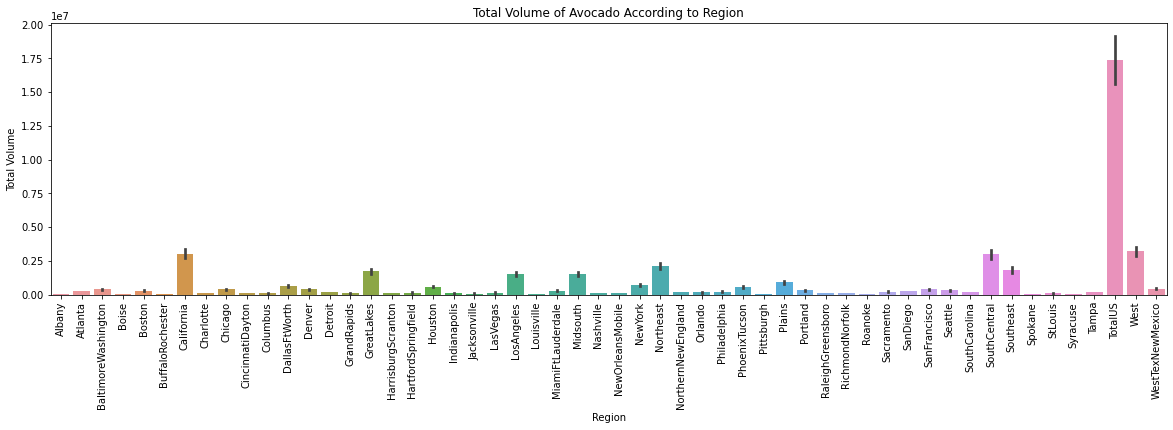

In [36]:
#Barplot for comparision between "region" and "Total Volume" column
plt.figure(figsize=(20,5))
sns.barplot(x='region', y='Total Volume', data=avacado)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocado According to Region')

We can see, the region where Total Volume is very high is:- __TotalUS__ and the region whereTotal Volume is very low is:- __Syracuse__

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

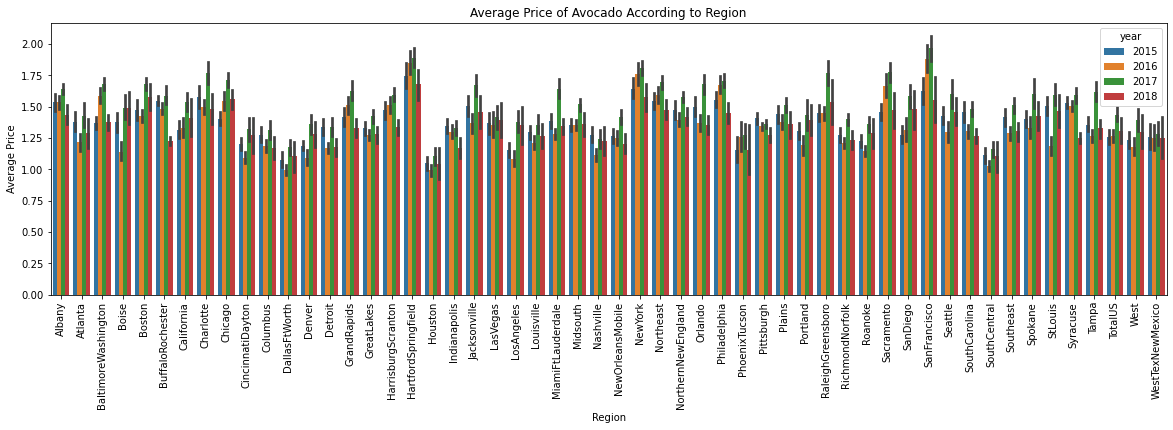

In [37]:
# The year and region for which the Average price the highest
plt.figure(figsize=(20,5))
sns.barplot(y='AveragePrice',x='region',data=avacado, hue='year')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

"Average Price" of Avocado According to "Region" SanFrancisco in year 2017 is highest and lowest in "Region" Houston in year 2016.

### Multivariate Analysis

##### Using pairplot

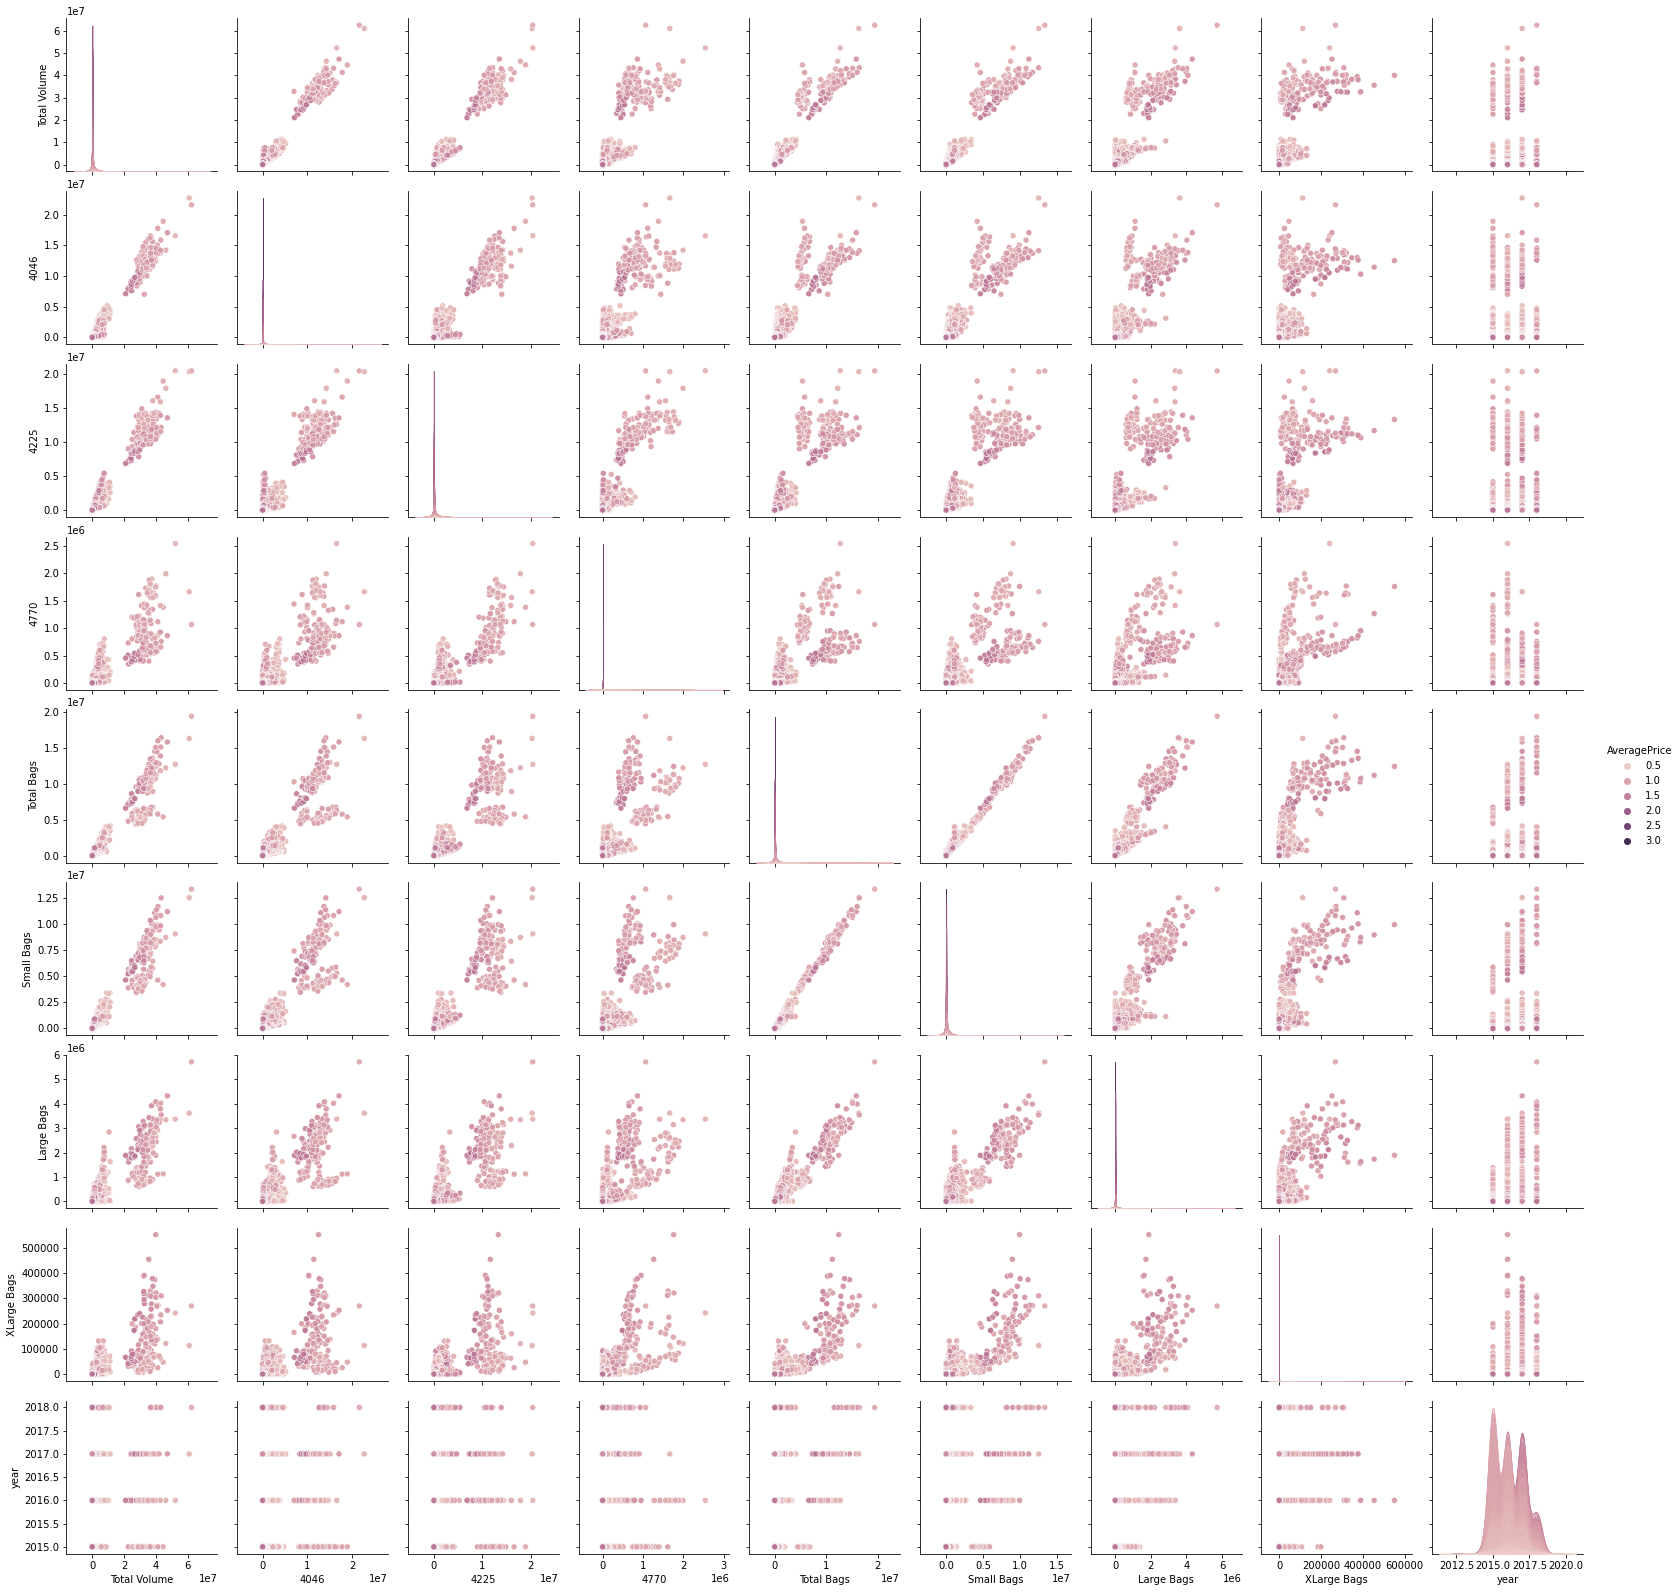

In [38]:
sns.pairplot(data=avacado,hue="AveragePrice")

This pair plot gives the relation between the columns which are plotted on the basis of target variable 'Average Price'.

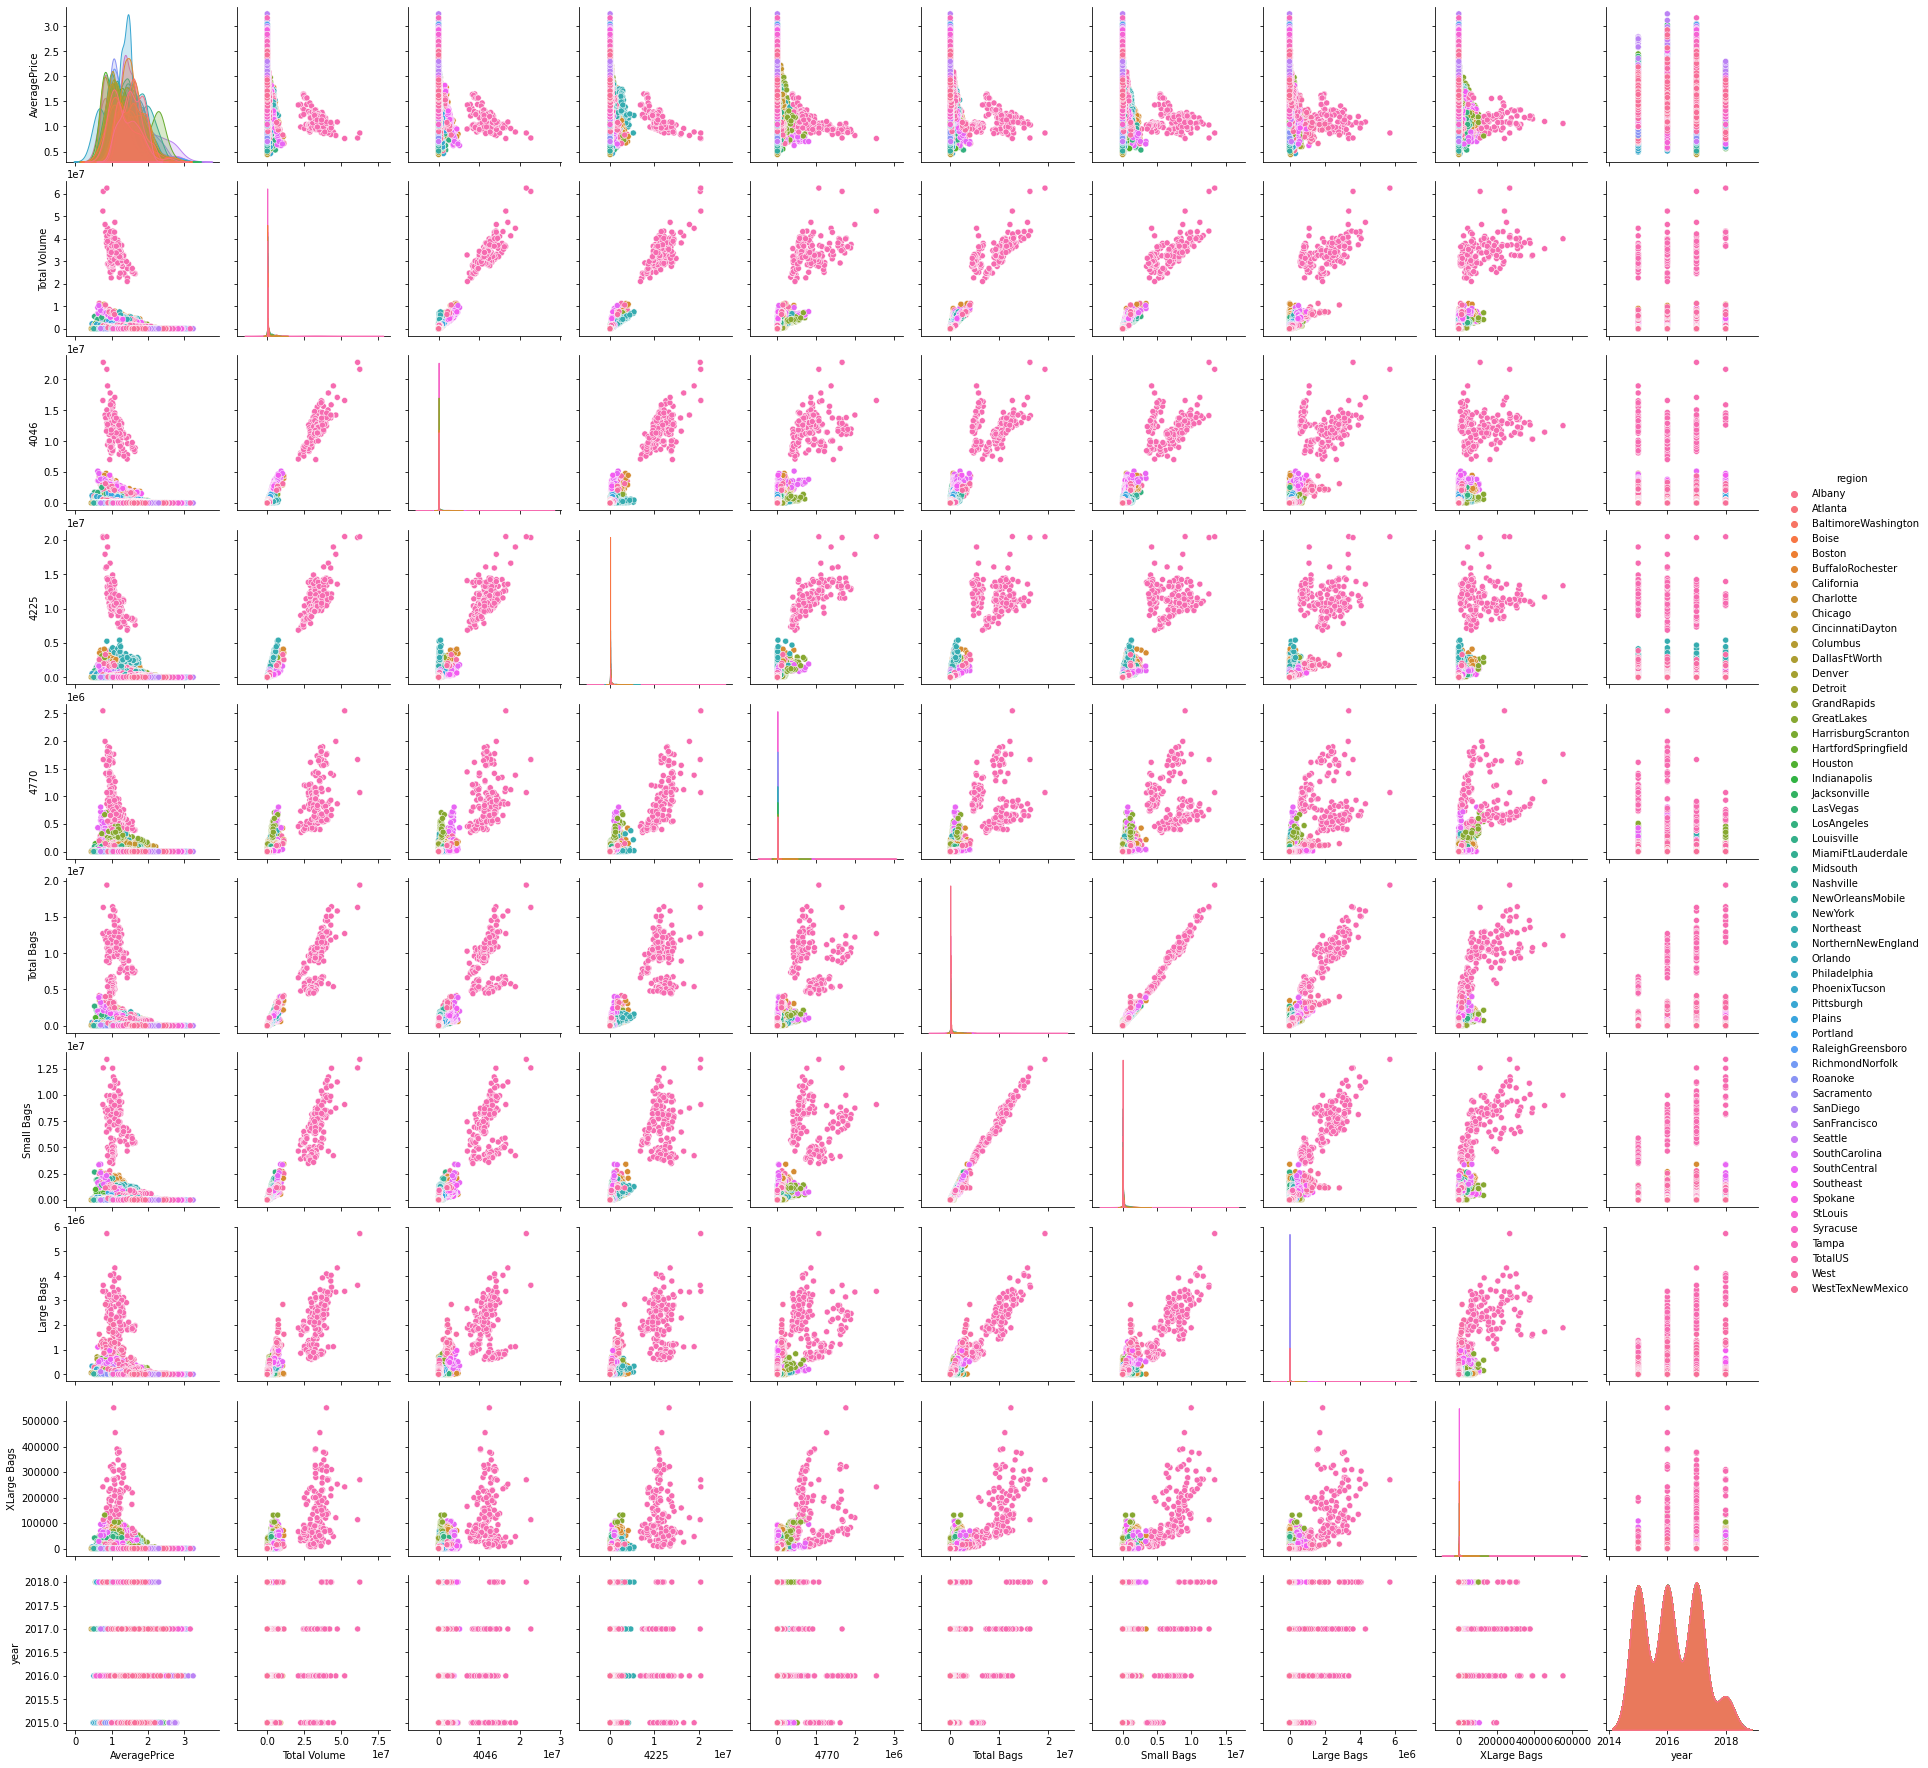

In [39]:
sns.pairplot(data=avacado,hue="region")

This pair plot gives the relation between the columns which are plotted on the basis of column 'region'.

## Checking Correlation

In [40]:
avacado.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


This gives the correlation between the denpendent and independent variables.

In [41]:
avacado.corr()["AveragePrice"].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
year            0.093197
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

We can observe least correlation is with column "4046" and strong correlation is with column "year". All columns are negatively correlated except "year" column which is positively correlated.

#### checking correlation with heatmap

<AxesSubplot:>

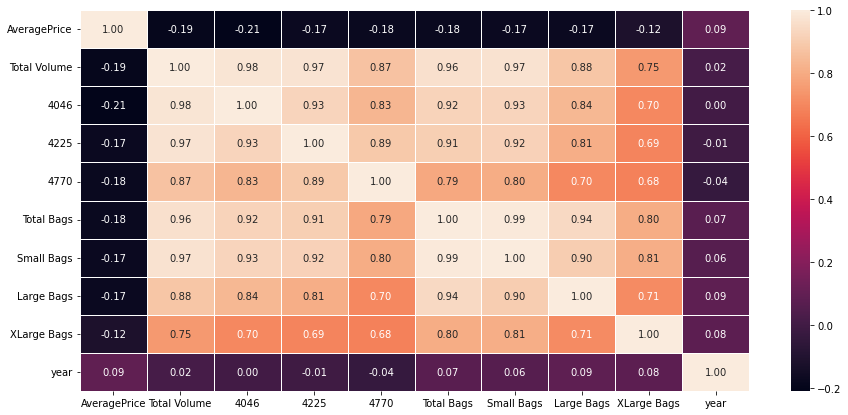

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(avacado.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

### Outcome of Correlation
- 'Total Volume' has -19 percent correlation with the target column which can be considered as good correlation and positively correlated.
- '4046' has -21 percent correlation with the target column which can be considered as weak correlation and negatively correlated.
- '4225' has -17 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- '4770' has -18 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'Total Bags' has -18 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'Small Bags' has -17 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'Large Bags' has -17 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'XLarge Bags' has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'year' has 9 percent correlation with the target column which can be considered as strong correlation and positively correlated.

- Max Correlation: year

- Min Correlation: 4046

#### Checking correlation with barplot

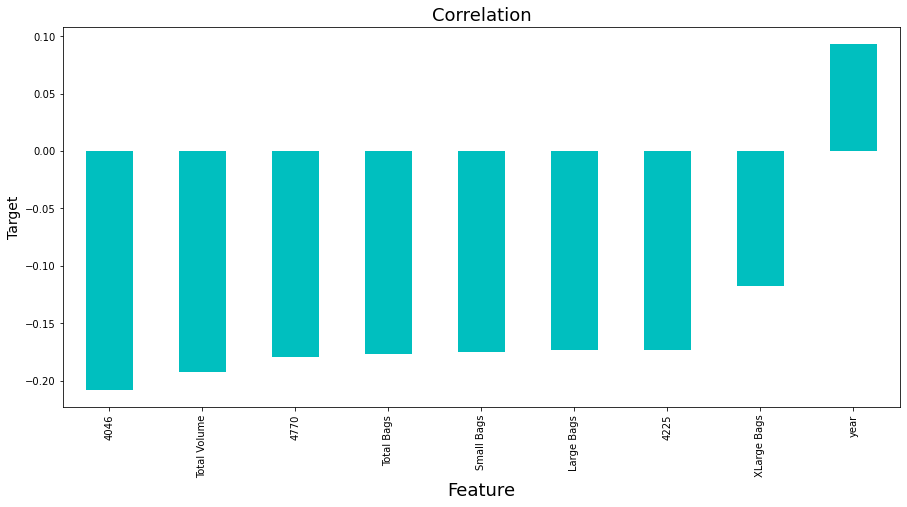

In [43]:
plt.figure(figsize=(15,7))
avacado.corr()['AveragePrice'].sort_values(ascending=True).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

#### Observation of the correlation:

- __Positively correlated__ with : year

- __Negatively correlated__ with :  '4046',  'Total Volume', '4770', 'Total Bags', 'Small Bags', 'Large Bags', '4225' and 'XLarge Bags'

- In heatmap we also observed that the '4046' column has __least correlation__ with the target variable.

## Label Encoding

In [44]:
encoder=LabelEncoder()

In [45]:
avacado["type"] = encoder.fit_transform(avacado[["type"]])
avacado["region"] =encoder.fit_transform(avacado[["region"]])

##### Checking both categorical column unique value after transformation

In [46]:
avacado["type"].unique()

array([0, 1])

In [47]:
avacado["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

#### Checking dataset after transformation

In [48]:
avacado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [49]:
avacado.corr()["AveragePrice"].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
year            0.093197
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [50]:
avacado.corr()["region"].sort_values()

AveragePrice   -0.011716
type           -0.000280
year           -0.000055
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

## Checking Outliers

In [51]:
avacado.shape

(18249, 12)

In [52]:
avacado.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

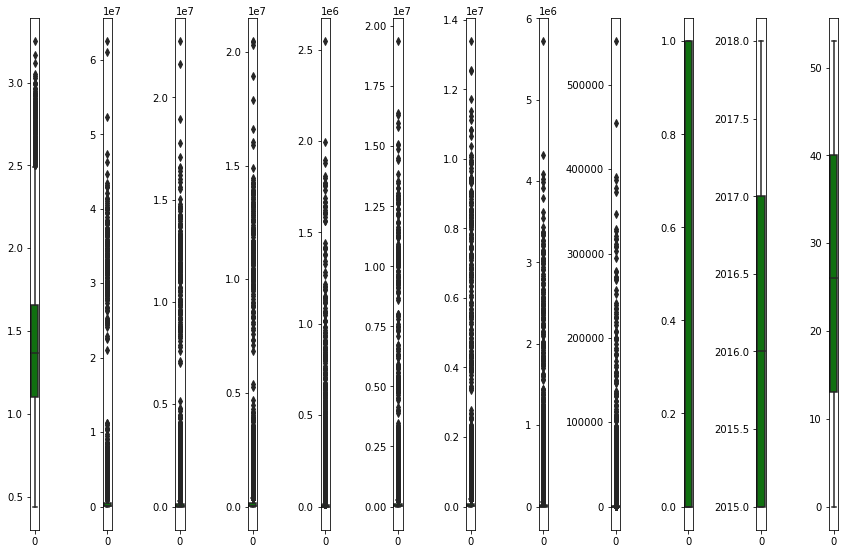

In [53]:
collist=avacado.columns.values
ncol=30
nrows=12
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=avacado[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation:
    
- Outliers are present in all continuous columns: 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags'.

- But we will not remove Outliers from 'AveragePrice'  column as it is Target column.

-  Outliers not present in all categorical columns: 'type', 'year' and 'region'.

## Removing Outliers

## 1. Zscore method using Scipy for Target Column "Average Price"

In [54]:
#  Outliers will be removed only from Continuous column variable: 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags'.. 
# We will not remove outliers from Categorical column i.e; 'type', 'year' & 'region' and from Target column i.e; AveragePrice.

variable = avacado[[ 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]

z=np.abs(zscore(variable))

# Creating new dataframe for regression
avacado1 = avacado[(z<3).all(axis=1)]
avacado1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [55]:
z.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558


In [56]:
print("Old DataFrame data in Rows and Column:",avacado.shape)
print("New DataFrame data in Rows and Column:",avacado1.shape)
print("Total Dropped rows:",avacado.shape[0]-avacado1.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)
New DataFrame data in Rows and Column: (17782, 12)
Total Dropped rows: 467


### Percentage Data Loss using Zscore

In [57]:
loss_percent=(18249-17782)/18249*100
print(loss_percent,"%")

2.55904433119623 %


## 1.1 Zscore method using Scipy for Target Column "region"

In [58]:
#  Outliers will be removed only from Continuous column variable: 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags'.. 
# We will not remove outliers from Categorical column i.e; 'type', 'year' & 'region' 

variable1 = avacado[[ 'AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]

z1=np.abs(zscore(variable))

# Creating new dataframe for classification
avacado_study = avacado[(z1<3).all(axis=1)]
avacado_study.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [59]:
z1.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558


In [60]:
print("Old DataFrame data in Rows and Column:",avacado.shape)
print("New DataFrame data in Rows and Column:",avacado_study.shape)
print("Total Dropped rows:",avacado.shape[0]-avacado_study.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)
New DataFrame data in Rows and Column: (17782, 12)
Total Dropped rows: 467


### Percentage Data Loss using Zscore

In [61]:
loss_percent=(18249-17782)/18249*100
print(loss_percent,"%")

2.55904433119623 %


## 2. IQR (Inter Quantile Range) method for Target Column "Average Price"

In [62]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
avacado2=avacado[~((avacado < (Q1 - 1.5 * IQR)) |(avacado > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
print("Old DataFrame data in Rows and Column:",avacado.shape)
print("\nNew DataFrame data in Rows and Column:",avacado2.shape)
print("\nTotal Dropped rows:",avacado.shape[0]-avacado2.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)

New DataFrame data in Rows and Column: (11747, 12)

Total Dropped rows: 6502


### Percentage Data Loss using IQR

In [64]:
loss_perc = (18249-11747)/18249*100
loss_perc

35.62934955340019

### 2.1 IQR (Inter Quantile Range) method for Target Column "region"

In [65]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
avacado3=avacado[~((avacado < (Q1 - 1.5 * IQR)) |(avacado > (Q3 + 1.5 * IQR))).any(axis=1)]

In [66]:
print("Old DataFrame data in Rows and Column:",avacado.shape)
print("\nNew DataFrame data in Rows and Column:",avacado3.shape)
print("\nTotal Dropped rows:",avacado.shape[0]-avacado3.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)

New DataFrame data in Rows and Column: (11747, 12)

Total Dropped rows: 6502


### Percentage Data Loss using IQR

In [67]:
loss_perc = (18249-11747)/18249*100
loss_perc

35.62934955340019

We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

## Checking for the skewness

In [68]:
#Target Column "Average Price"
avacado1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [69]:
#Target Column "region"
avacado_study.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

#### Observation: 
- Skewness threshold taken is +/-1, Columns which are having skewness: 'AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags'

- The 'XLarge Bags' column data is highly skewed

- All the columns are not normallly distributed

- We will not remove skewness from 'AveragePrice' column when it is Target column but will remove when "region" is Target column

- Also we will remove skewness from 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags' and these all column contains continuous data.

#### Checking skewness through data visualization

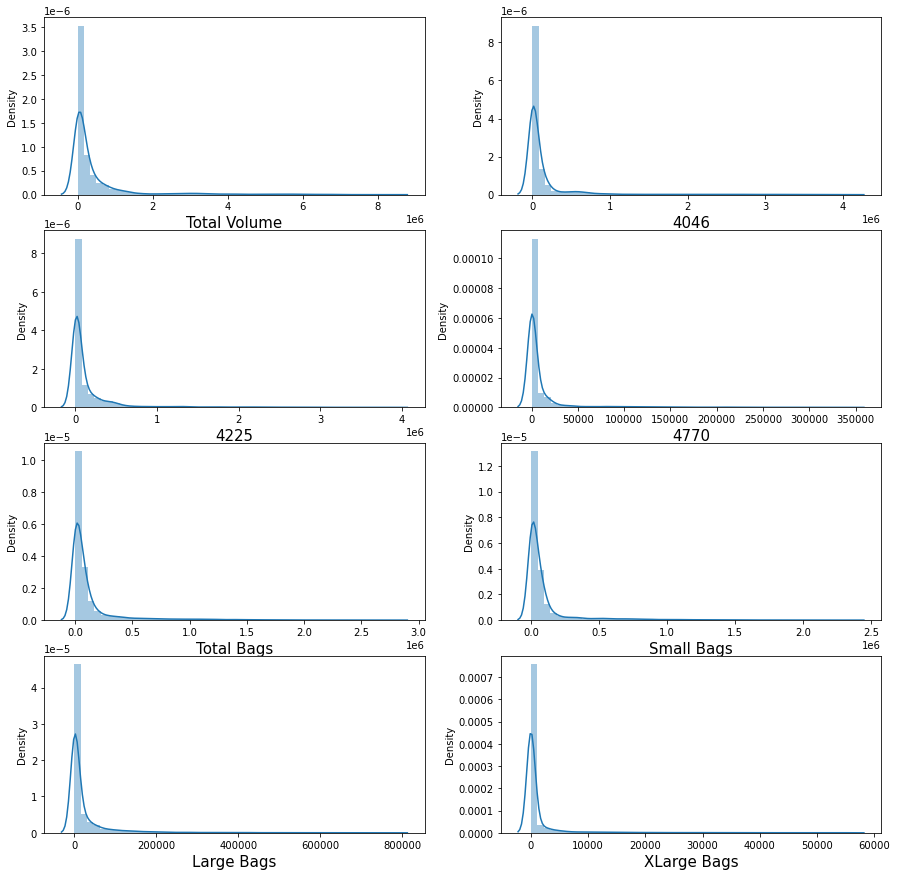

In [70]:
#when "AveragePrice" is Target Column
collist=['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in avacado1[collist]:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(avacado1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in the columns

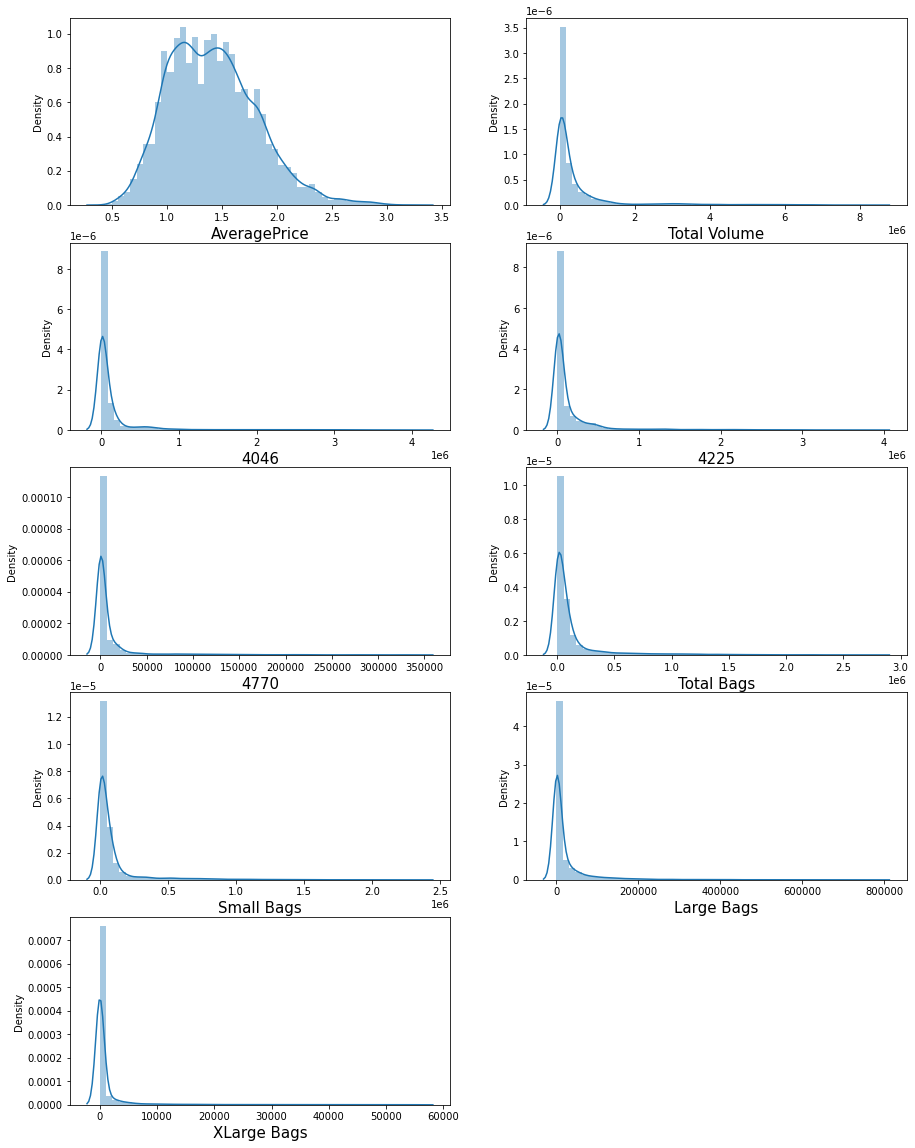

In [71]:
#when "region" is Target Column
collist=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

plt.figure(figsize=(15,20))
plotnumber = 1

for column in avacado_study[collist]:
    if plotnumber<=9:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(avacado_study[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

## Removing skewness using yeo-johnson method

In [72]:
#Target column is "AveragePrice"
collist=['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

avacado1[collist]=power_transform(avacado1[collist],method='yeo-johnson')
avacado1[collist]

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702
...,...,...,...,...,...,...,...,...
18244,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702
18245,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702
18246,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702
18247,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702


In [73]:
#Target column is "region"
collist=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

avacado_study[collist]=power_transform(avacado1[collist],method='yeo-johnson')
avacado_study[collist]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.116108,-0.075636,-0.653168,0.348247,-0.211458,-0.534226,-0.345468,-0.789832,-0.688181
1,-0.063731,-0.147608,-0.772216,0.265547,-0.163999,-0.495440,-0.309714,-0.780450,-0.688181
2,-1.300650,0.205534,-0.727091,0.650156,0.035375,-0.562635,-0.372226,-0.768495,-0.688181
3,-0.822900,0.019251,-0.628477,0.466989,-0.109835,-0.706795,-0.507188,-0.712352,-0.688181
4,-0.249571,-0.180657,-0.680097,0.258097,-0.099145,-0.680530,-0.486987,-0.624897,-0.688181
...,...,...,...,...,...,...,...,...,...
18244,0.615242,-0.674146,-0.458796,-0.923266,-1.225582,-0.339795,-0.175213,-0.438299,-0.688181
18245,0.792624,-0.766138,-0.613983,-0.671633,-1.225582,-0.506657,-0.330168,-0.508192,-0.688181
18246,1.128329,-0.770037,-0.613931,-0.778430,0.456238,-0.500600,-0.312125,-0.948869,-0.688181
18247,1.248180,-0.697455,-0.543343,-0.716793,0.455928,-0.432385,-0.249325,-0.916472,-0.688181


#### Checking skewness again after removal

In [74]:
avacado1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [75]:
avacado_study.skew()

AveragePrice    0.004164
Total Volume    0.023040
4046           -0.015818
4225            0.004294
4770            0.026169
Total Bags      0.020499
Small Bags      0.019905
Large Bags      0.015587
XLarge Bags     0.774360
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

We can see skewness is removed.

#### Checking skewness through data visualization again after removal

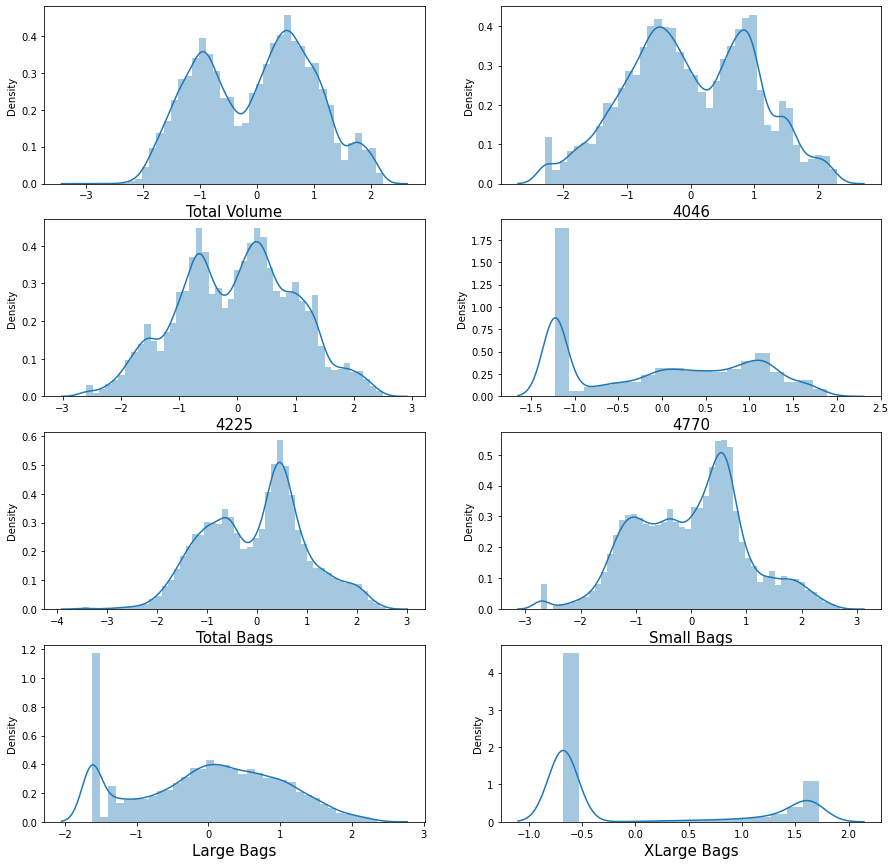

In [76]:
#target variable is "AveragePrice"
collist=['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in avacado1[collist]:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(avacado1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

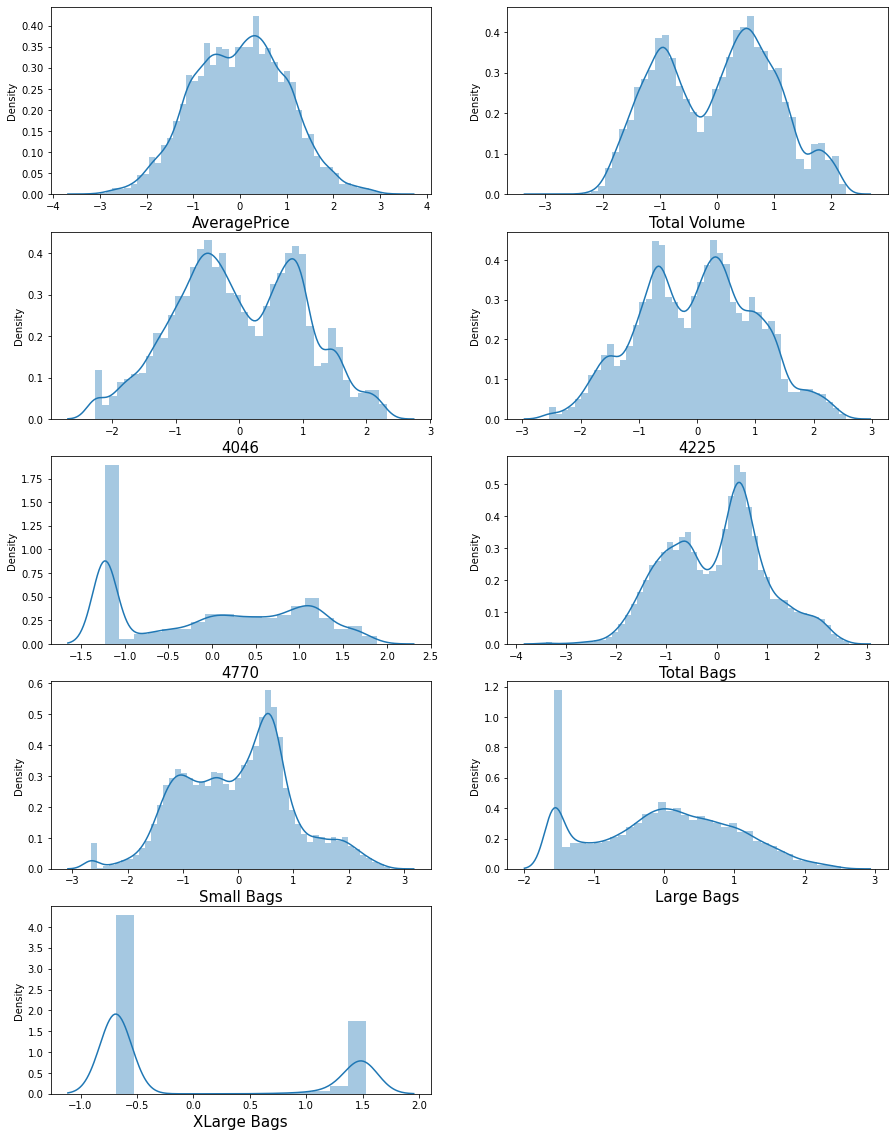

In [77]:
#when "region" is Target Column
collist=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

plt.figure(figsize=(15,20))
plotnumber = 1

for column in avacado_study[collist]:
    if plotnumber<=9:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(avacado_study[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Now we can see that the data is almost normally distributed. But we can see that the feature variables are negatively skewed and it will inverse relationship between feature variables and target variables. So to remove this, we will use variance threshold method.

## Data preprocessing

### Spliting data into Target and Features:

#### Target Variable is AveragePrice

In [78]:
x=avacado1.drop("AveragePrice",axis=1)
y=avacado1["AveragePrice"]

In [79]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,0
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,0
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,0
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,0
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,0


In [80]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [81]:
x.shape, y.shape

((17782, 11), (17782,))

#### Target Variable is region

In [82]:
x1=avacado1.drop("region",axis=1)
y1=avacado1["region"]

In [83]:
x1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015


In [84]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [85]:
x1.shape, y1.shape

((17782, 11), (17782,))

## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [86]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [87]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

#### Target Variable is AveragePrice

In [88]:
x.columns[var_threshold.get_support()]

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [89]:
x.shape

(17782, 11)

In [90]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


#### Target Variable is region

In [91]:
x1.columns[var_threshold.get_support()]

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'],
      dtype='object')

In [92]:
x1.shape

(17782, 11)

In [93]:
# taking  out  all the  constant  columns 
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

## SelectKBest method

#### Target Variable is AveragePrice

In [94]:
best_fit = SelectKBest(score_func = f_classif, k =11)
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [95]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

         Feature      Score
8           type  49.966168
0   Total Volume  39.927250
1           4046  36.480181
4     Total Bags  35.879124
3           4770  27.651101
5     Small Bags  25.039951
6     Large Bags  23.354747
2           4225  21.772853
7    XLarge Bags  15.065353
9           year   3.163539
10        region   1.291093


Selecting the best features based on above scores, we can see that the column "region" has most lowest features for the prediction, so we will drop this column.

In [96]:
x = x.drop([ "region"],axis=1)

In [97]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702,1,2018
18245,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702,1,2018
18246,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702,1,2018
18247,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702,1,2018


#### Target Variable is region

In [98]:
best_fit1 = SelectKBest(score_func = f_classif, k =11)
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)

fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)
dfcolumns1.head()
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis = 1)
featureScores1.columns = ['Feature', 'Score']
print(featureScores1.nlargest(11,'Score'))

         Feature       Score
2           4046  180.309702
7     Large Bags  159.457692
3           4225  142.620675
5     Total Bags  131.076425
6     Small Bags  128.822420
1   Total Volume  118.194755
4           4770   83.840618
0   AveragePrice   66.630123
8    XLarge Bags   27.397082
9           type    4.159580
10          year    0.378935


Selecting the best features based on above scores, we can see that the column "year" has most lowest features for the prediction, so we will drop this column.

In [99]:
x1 = x1.drop([ "year"],axis=1)
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702,1
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702,1
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702,1
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702,1


Now, we have completed features selection process through using 2 techniques.

## Checking for Multicolinearity

### VIF (Variance Inflation factor)

#### Target Variable is AveragePrice

In [100]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,51.668269,Total Volume
1,6.728047,4046
2,11.114028,4225
3,3.786217,4770
4,33.798364,Total Bags
5,16.570740,Small Bags
6,3.437234,Large Bags
7,1.965192,XLarge Bags
8,7.531878,type
9,4.864297,year


The VIF value is more than 10 in the columns 'Total Volume', '4225', 'Total Bags' and 'Small Bags'. But column 'Total Volume' is having highest VIF value. So, we will drop column 'Total Volume'.

In [101]:
x.drop('Total Volume', axis =1, inplace=True)

### Checking again Multicolinearity using VIF

In [102]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,3.411924,4046
1,4.155664,4225
2,3.775437,4770
3,24.044284,Total Bags
4,16.570218,Small Bags
5,3.391418,Large Bags
6,1.949446,XLarge Bags
7,7.050966,type
8,4.617580,year


Here we can see that Multicolinearity is still present in the columns. So, we will again drop highest VIF value column which is 'Total Bags' for removing Multicolinearity.

In [103]:
x.drop('Total Bags', axis =1, inplace=True)

### Checking again Multicolinearity using VIF

In [104]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,3.403686,4046
1,4.041277,4225
2,3.770623,4770
3,3.559855,Small Bags
4,1.749704,Large Bags
5,1.949136,XLarge Bags
6,7.047209,type
7,4.615647,year


__Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.__

#### Target Variable is region

In [105]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,5.619090,AveragePrice
1,49.820291,Total Volume
2,6.722687,4046
3,11.037281,4225
4,3.714371,4770
5,34.160354,Total Bags
6,16.744872,Small Bags
7,3.440905,Large Bags
8,1.969717,XLarge Bags
9,8.425873,type


The VIF value is more than 10 in the columns 'Total Volume', '4225', 'Total Bags' and 'Small Bags'. But column 'Total Volume' is having highest VIF value. So, we will drop column 'Total Volume'.

In [106]:
x1.drop('Total Volume', axis =1, inplace=True)

### Checking again Multicolinearity using VIF

In [107]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,5.531946,AveragePrice
1,3.341500,4046
2,4.290236,4225
3,3.712837,4770
4,24.250715,Total Bags
5,16.740961,Small Bags
6,3.392263,Large Bags
7,1.962026,XLarge Bags
8,8.203285,type


Here we can see that Multicolinearity is still present in the columns. So, we will again drop highest VIF value column which is 'Total Bags' for removing Multicolinearity.

In [108]:
x1.drop('Total Bags', axis =1, inplace=True)

### Checking again Multicolinearity using VIF

In [109]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,5.482561,AveragePrice
1,3.329579,4046
2,4.140533,4225
3,3.712681,4770
4,3.549038,Small Bags
5,1.796646,Large Bags
6,1.958225,XLarge Bags
7,8.149936,type


__Now, we can see The VIF value is less than 10 in all columns in both type. So, we will create model now.__

## Creating Model

### Finding the best random state among all the models

#### for Regression model

In [110]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8328715180918521 on random_state: 72


__At random state 72, we are getting best accuracy score i.e., 83%__

## Creating train-test-split

#### For regression model

In [111]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [112]:
x.shape, y.shape

((17782, 8), (17782,))

In [113]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12447, 8), (12447,), (5335, 8), (5335,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. 

####  We have to check this dataset through both model building, regression and classification. First, we are using regression model then classification.

## 1. Regression Model Building

## Linear Regression

In [114]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)

#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.4682033874553484
Mean abs error:  0.22586476376443043
Mean squared error:  0.08552850511024788
Root Mean Squared Error:  0.2924525689923887


__R2 score for Linear Regression is 46%__

### Checking the performance of the model by graph

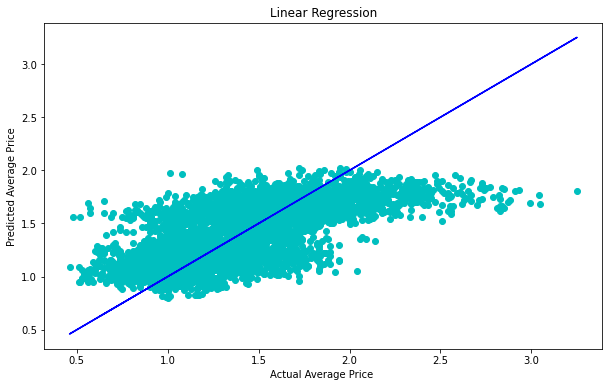

In [115]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Linear Regression")
plt.show()

## Random forest Regression Model

In [116]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8206288100609307
Mean abs error:  0.11830307403936287
Mean squared error:  0.028848152420389506
Root Mean Squared Error:  0.16984743866302343


__R2 score for Random forest Regression is 82%__

### Checking the performance of the model by graph

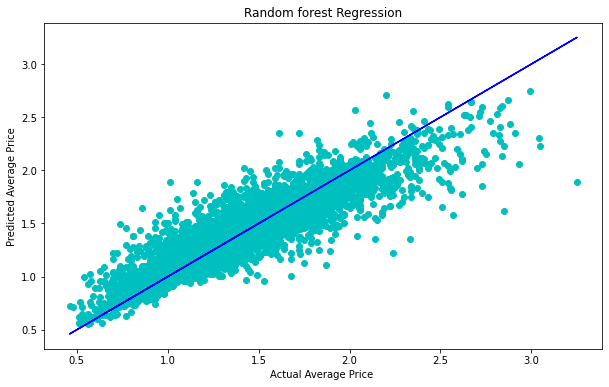

In [117]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Random forest Regression")
plt.show()

## KNN regressor

In [118]:
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.7722754284929972
Mean abs error:  0.13485952306570861
Mean squared error:  0.03662479549214944
Root Mean Squared Error:  0.1913760577819217


__R2 score for KNN regressor is 77%__

### Checking the performance of the model by graph

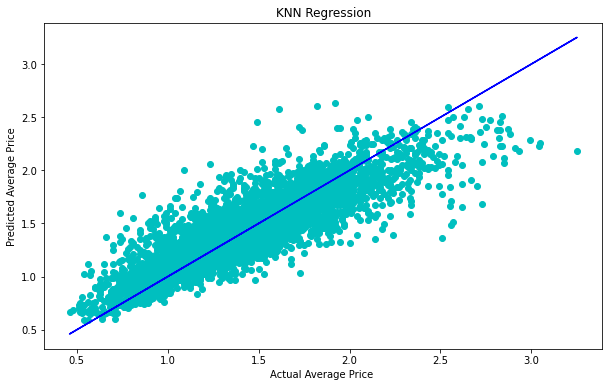

In [119]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("KNN Regression")
plt.show()

## Gradient Boosting Regressor

In [120]:
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.7106509133170524
Mean abs error:  0.1597744354968962
Mean squared error:  0.04653582639534045
Root Mean Squared Error:  0.2157216409990904


__R2 score for Gradient Boosting Regressor is 71%__

### Checking the performance of the model by graph

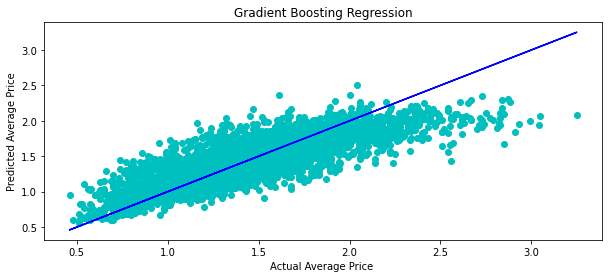

In [121]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,4))
plt.scatter(x=y_test,y=pred_Gb,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Gradient Boosting Regression")
plt.show()

## Ridge Regressor

In [122]:
paramRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'solver': 'saga'}


In [123]:
# Checking R2 score for Ridge Regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
# prediction
pred_ridge=ridge.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_ridge))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_ridge))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_ridge))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 score:  0.46822442464079694
Mean abs error:  0.2258089071737975
Mean squared error:  0.08552512171332377
Root Mean Squared Error:  0.2924467844126924


__R2 score for Ridge regressor is 46%__

### Checking the performance of the model by graph

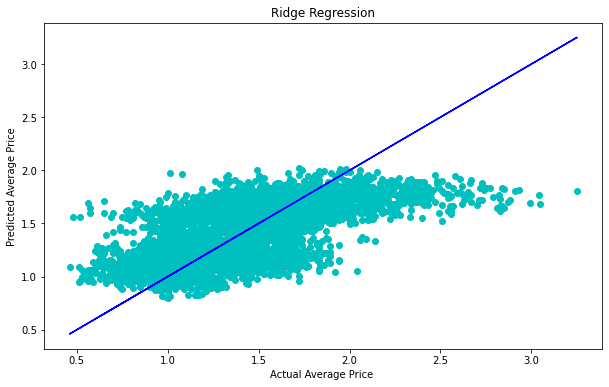

In [124]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_ridge,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Ridge Regression")
plt.show()

## Checking Cross Validation Score of Models

#### Checking CV score for Linear Regression

In [125]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x,y,cv=5).mean())

The CV score  for Linear_regression is : 0.060277038833460875


#### Checking CV score for Random Forest Regression

In [126]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=5).mean())

The CV  score for  the Random forest regressor is: 0.2775060137272718


#### Checking CV score for KNN Regression

In [127]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=5).mean())

The CV score  for  the KNN regressor is : 0.06220788143289739


#### Checking CV score for GBR Regression

In [128]:
print('The CV score  for  the GBR regressor is :',cross_val_score(Gb,x,y,cv=5).mean())

The CV score  for  the GBR regressor is : 0.34688613837153603


#### Checking CV score for Ridge Regression

In [129]:
print('The CV score  for  the Ridge regressor is :',cross_val_score(ridge,x,y,cv=5).mean())

The CV score  for  the Ridge regressor is : 0.05947941637038527


## Hyper Parameter Tuning

### The Random Forest Regressor with GridsearchCV

In [130]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [131]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

#### Creating Final Regressor Model

In [132]:
Best_model_Regressor = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [133]:
#prediction
pred = Best_model_Regressor.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_RFR)
print(acc*100)

82.06288100609306


__So, after the Hypertuning now we got a accuracy score of 82% on Random Forest Regression__

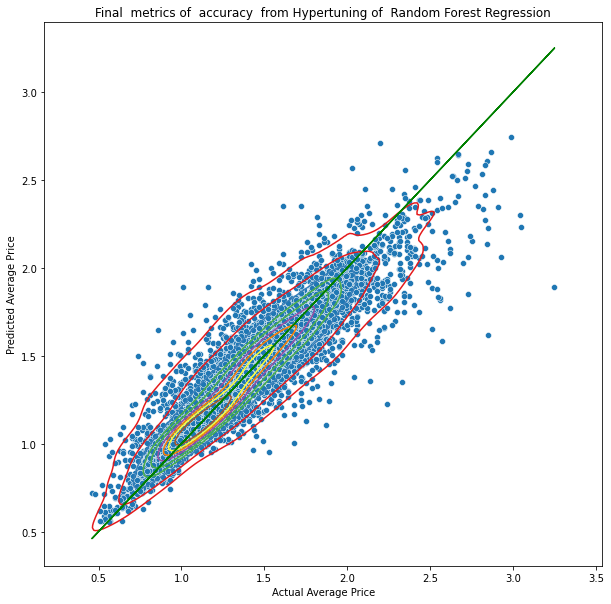

In [134]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred_RFR,palette='Set2')
sns.kdeplot(x=y_test,y=pred_RFR, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Average Price")
plt.ylabel("Predicted Average Price")
plt.title("Final  metrics of  accuracy  from Hypertuning of  Random Forest Regression")
plt.show()

### Saving The Predictive Regressor Model

In [135]:
#saving the model at local file system
filename='Avacado_Regressor_Project.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
#prediction using the saved model
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)

array([1.17468627, 1.13896331, 1.33804793, ..., 1.62773838, 1.57840541,
       0.69339153])

In [136]:
# Adjusted R2 score
lr.score(x_train,y_train)

0.4693017159712014

#### Let's check how well model fits the test data

In [137]:
lr.score(x_test,y_test)

0.4682033874553484

### Prediction of Regressor Model

In [138]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Avacado_Regressor = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Avacado_Regressor

,Original,Predicted
0,1.54,1.174686
1,1.08,1.138963
2,1.15,1.338048
3,1.45,1.685571
4,2.34,2.393288
...,...,...
5330,1.59,1.840681
5331,1.83,1.704888
5332,1.35,1.627738
5333,1.70,1.578405


### Let's plot and visualize

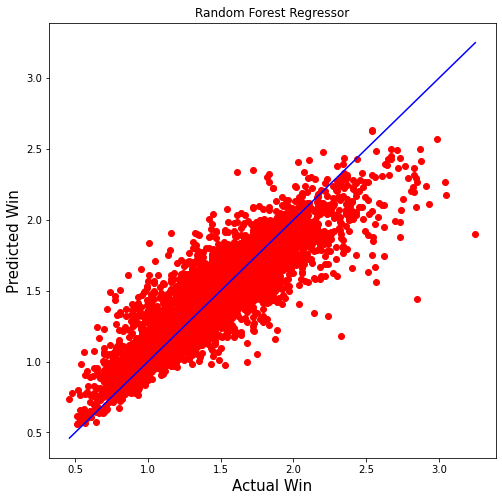

In [139]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='r')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title("Random Forest Regressor")
plt.show()

## 2. Classification Model Building

#### For Target Column region

### Finding the best random state among all the models

In [140]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7973758200562324  on Random_state  71


__At random state 71, Best accuracy is 79%__

### Creating train-test-split

In [141]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [142]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12447, 8), (12447,), (5335, 8), (5335,))

In [143]:
x.shape, y.shape

((17782, 8), (17782,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. As it is a continuous data , so we have to understand this by Classification problem

## Decision Tree Classifier

In [144]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.7940018744142455
confusion_matrix: 
 [[89  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  1]
 [ 0  0 86 ...  0  0  3]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  1  2 ...  0  0 64]]
classification_report: 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       112
           1       0.69      0.67      0.68       107
           2       0.90      0.83      0.86       103
           3       0.87      0.81      0.84       106
           4       0.79      0.86      0.82       104
           5       0.75      0.64      0.69       110
           6       0.99      0.92      0.95        99
           7       0.79      0.82      0.81       104
           8       0.94      0.94      0.94       107
           9       0.85      0.81      0.83       113
          10       0.70      0.69      0.69        97
          11       0.78      0.83      0.81       112
          12       0.82      0.75      0.78        97
      

__Accuracy Score for Decision Tree Classifier is 79%__

## Random Forest Classifier

In [145]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8982193064667291
confusion_matrix: 
 [[ 99   0   0 ...   0   0   0]
 [  0  92   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  63   0   0]
 [  0   0   0 ...   0  70   0]
 [  0   0   1 ...   0   0  83]]
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.89      0.86      0.88       107
           2       0.94      0.97      0.96       103
           3       0.93      0.82      0.87       106
           4       0.94      0.92      0.93       104
           5       0.90      0.82      0.86       110
           6       0.99      0.97      0.98        99
           7       0.91      0.90      0.91       104
           8       0.98      0.98      0.98       107
           9       0.90      0.90      0.90       113
          10       0.91      0.89      0.90        97
          11       0.89      0.97      0.93       112
          12       0.95 

__Accuracy Score for Random Forest Classifier is 89%__

## Support Vector Machine Classifier

In [146]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print(accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test,pred_svc))

0.6513589503280225
[[89  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 84 ...  0  0  2]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  3  0 ...  0  0 57]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       112
           1       0.36      0.66      0.47       107
           2       0.80      0.82      0.81       103
           3       0.66      0.68      0.67       106
           4       0.63      0.71      0.67       104
           5       0.64      0.55      0.59       110
           6       0.92      0.93      0.92        99
           7       0.64      0.60      0.62       104
           8       0.79      0.80      0.80       107
           9       0.73      0.85      0.78       113
          10       0.57      0.53      0.55        97
          11       0.63      0.73      0.67       112
          12       0.63      0.64      0.64        97
          13       0.56      0.64      0.60        95
          14  

__Accuracy Score for Support Vector Machine Classifier is 65%__

## KNN Classifier

In [147]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test,pred_knn))

0.8596063730084349
[[102   0   0 ...   0   0   0]
 [  0  92   0 ...   0   0   0]
 [  0   0  92 ...   0   0   0]
 ...
 [  0   0   0 ...  63   0   0]
 [  0   0   0 ...   0  68   0]
 [  0   0   0 ...   0   0  72]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       112
           1       0.78      0.86      0.82       107
           2       0.93      0.89      0.91       103
           3       0.85      0.79      0.82       106
           4       0.87      0.88      0.87       104
           5       0.79      0.74      0.76       110
           6       0.97      0.98      0.97        99
           7       0.83      0.88      0.85       104
           8       0.96      0.94      0.95       107
           9       0.83      0.87      0.85       113
          10       0.81      0.84      0.82        97
          11       0.87      0.98      0.92       112
          12       0.95      0.90      0.92        97
          13       0.76      0.7

__Accuracy Score for KNN Classifier is 86%__

## Cross Validation Score for all the model

### CV Score for Decision Tree Classifier

In [149]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x1,y1,cv=5).mean())

CV score for Decision Tree Classifier:  0.5458303198465106


### CV Score for Random Forest Classifier

In [150]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x1,y1,cv=9).mean())

CV score for Random forest Classifier:  0.7641929596793021


### CV Score for Support Vector Classifier

In [151]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x1,y1,cv=9).mean())

CV score for Support Vector  Classifier:  0.557298581572399


### CV Score for KNN Classifier

In [152]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x1,y1,cv=9).mean())

CV score for KNN Classifier:  0.7094762466048274


## Hyper parameter tuning for best model using GridsearchCV

In [153]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [154]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = 50)

In [162]:
rfc=RandomForestClassifier(random_state=42)

In [163]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
ava_region = RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
ava_region.fit(x_train, y_train)
pred = ava_region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

In [ ]:
# calculating the scores 
score = cross_val_score(RFC,x1,y1,cv=100,scoring="accuracy").mean()
print("Cross Validation Score: ", score*100)
print("Mean Score :", score.mean()*100)
print("STD Score:", score.std())

### ROC-AUC Curve

In [ ]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

In [ ]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristic")
plt.legend(loc="lower right")
plt.show()

### Saving the Classification Model

In [ ]:
filename='Avacado_region.pickle'
pickle.dump(CV_GB,open(filename,'wb'))
loaded_model2 = pickle.load(open(filename, 'rb'))
loaded_model2.predict(x_test)

### Checking predicted and original values

In [ ]:
a =np.array(y_test)
predicted=np.array(CV_GB.predict(x_test))
Avacado_regions=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Avacado_regions